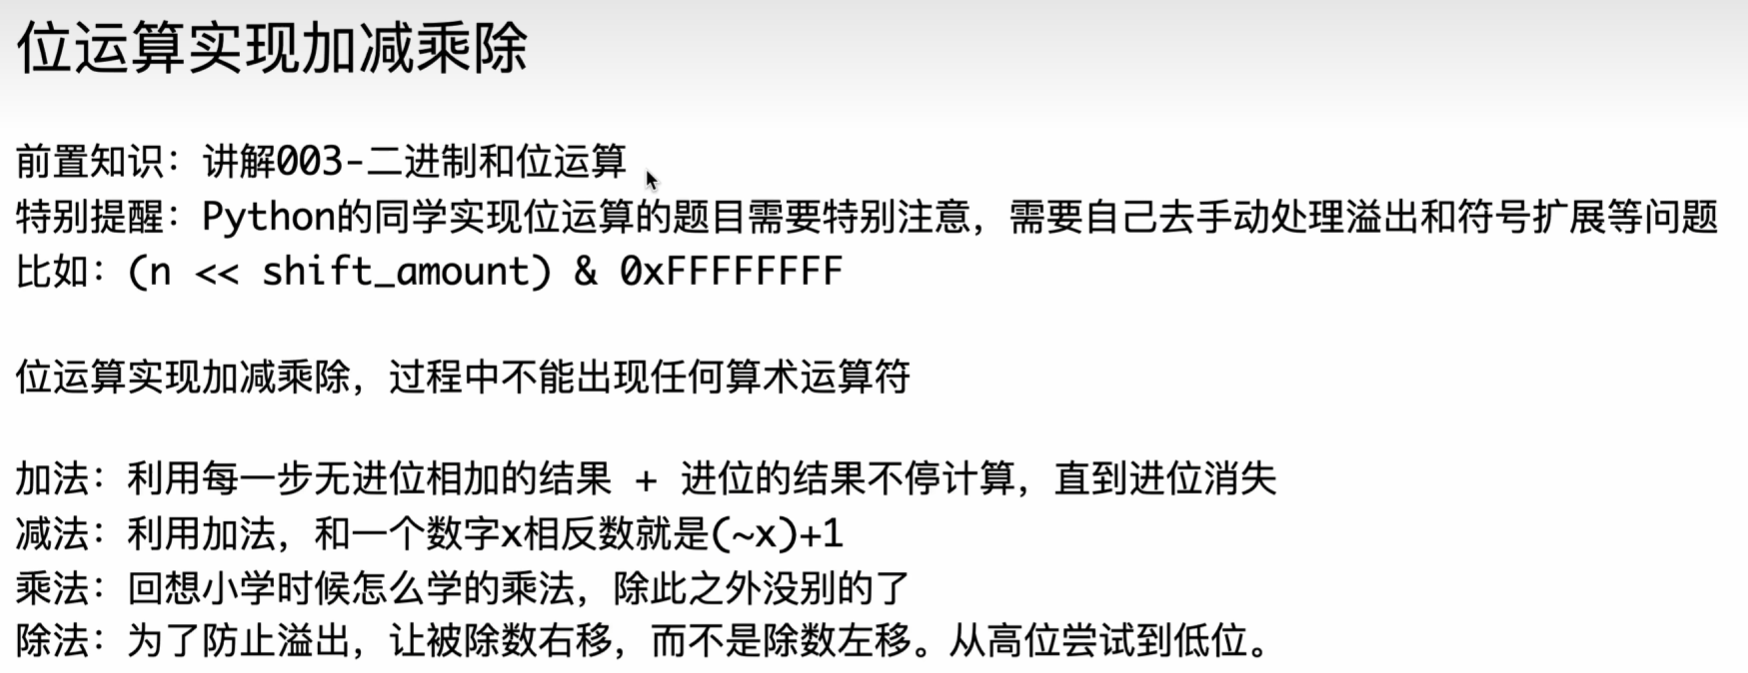

加法：异或运算(无进位相加) + 进位信息      
进位信息：两个数字与一下，得到的数字向左左移一位然后再与异或运算的结果相加;直到进位信息消失就停止

In [1]:
def add(a, b):
    while b != 0:
        # ans: a和b无进位相加的结果
        ans = a ^ b
        # b: a和b相加时的进位信息
        b = (a & b) << 1
        a = ans
    return a

In [2]:
def neg(n):
    return add(~n, 1)

def minus(a, b):
    return add(a, neg(b))

In [6]:
def multiply(a, b):
    ans = 0
    while b != 0:
        if (b & 1) != 0:
            # 考察b当前最右的状态！
            ans = add(ans, a)
        a <<= 1
        b >>= 1
    return ans

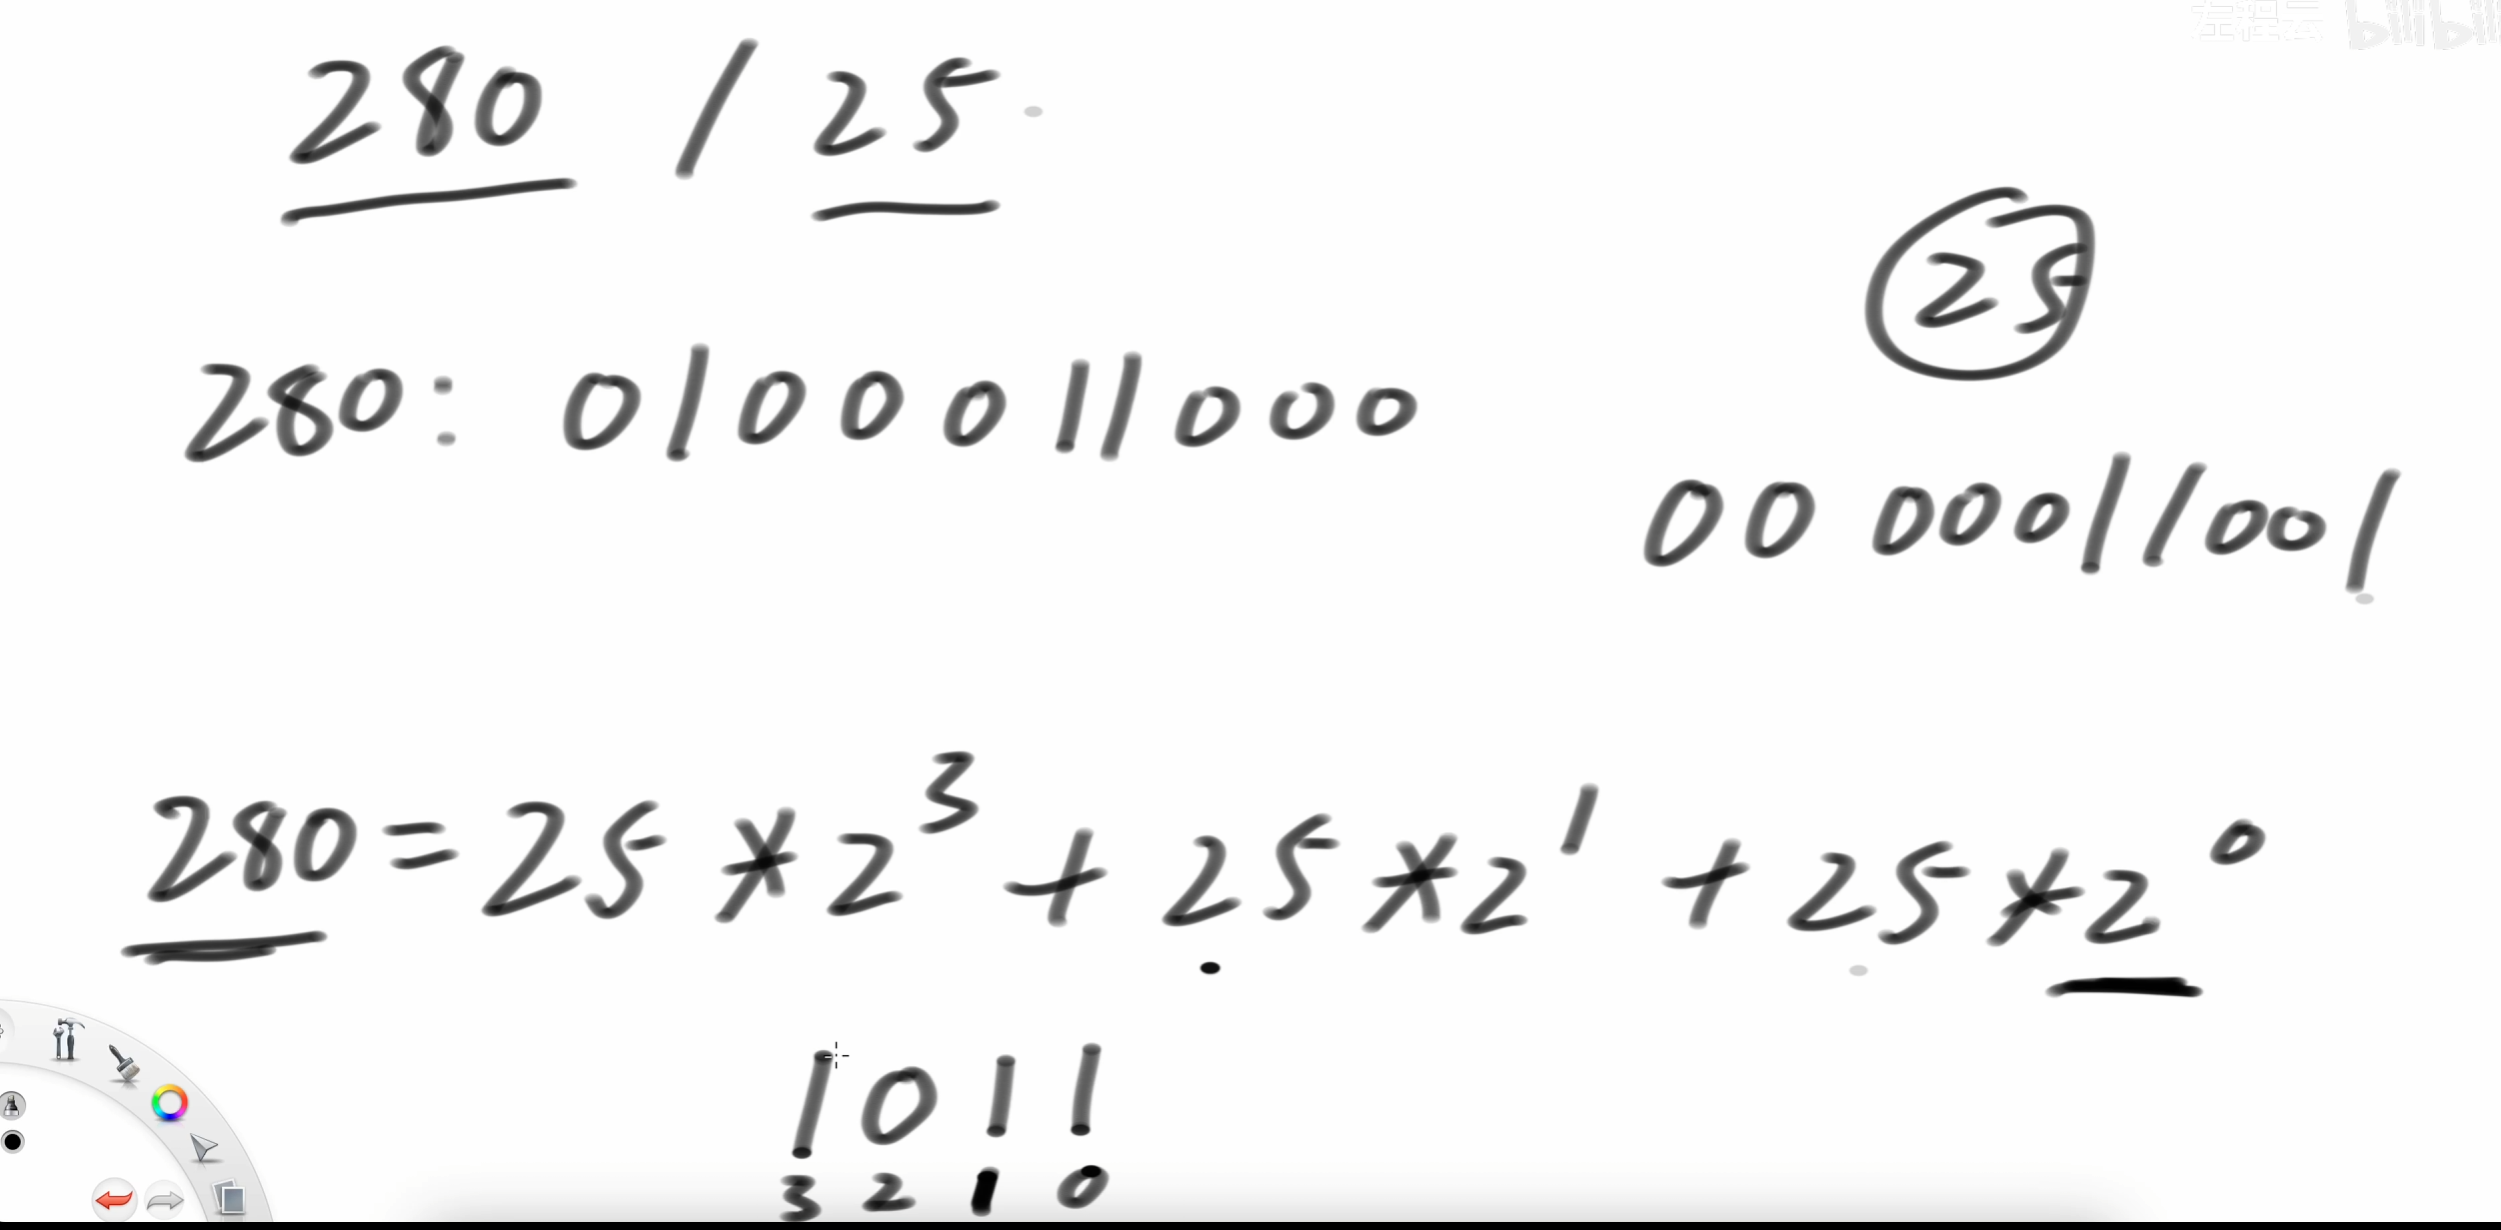

验证280是否含有25乘以2的31次方，以此类推，直到280大于25乘以2的3次方；280-25乘以2的3次方得到80；继续尝试80是否含有2的平方；

In [7]:
def div(a, b):
    x = neg(a) if a < 0 else a
    y = neg(b) if b < 0 else b
    ans = 0
    i = 30
    while i >= 0:
        if (x >> i) >= y:
            ans |= (1 << i)
            x = minus(x, y << i)
        i = minus(i, 1)
    return neg(ans) if (a < 0) ^ (b < 0) else ans